In [25]:
import torch
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.linear_model import LinearRegression

In [26]:
X,y = load_diabetes(return_X_y=True, as_frame=True)

<AxesSubplot: xlabel='target', ylabel='Count'>

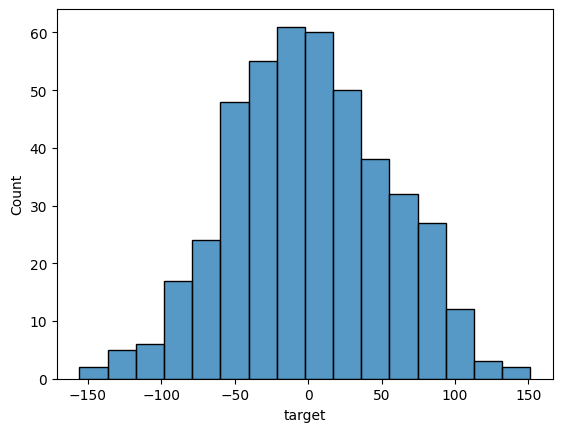

In [27]:
sns.histplot(y-LinearRegression().fit(X,y).predict(X))

In [28]:
X,y = load_breast_cancer(return_X_y=True, as_frame=True)

<AxesSubplot: xlabel='target', ylabel='Count'>

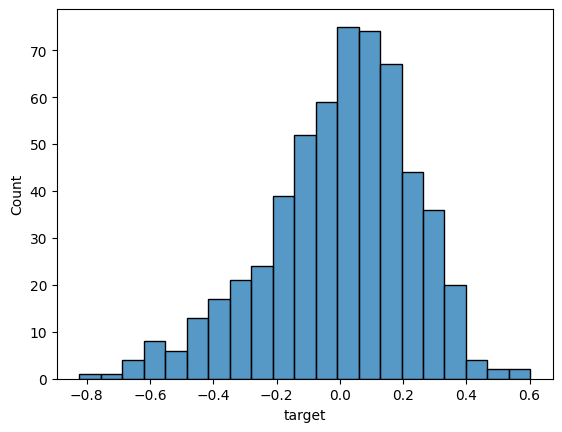

In [29]:
sns.histplot(y-LinearRegression().fit(X,y).predict(X))

In [30]:
data = pd.read_csv("data/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [31]:
data["sex"] = (data["sex"]=="male").astype(np.int64)
data["smoker"] = (data["smoker"]=="yes").astype(np.int64)

data["region_1"] = (data["region"]=="southwest").astype(np.int64)
data["region_2"] = (data["region"]=="southeast").astype(np.int64)
del data["region"]

data.head()

,age,sex,bmi,children,smoker,expenses,region_1,region_2
0,19,0,27.9,0,1,16884.92,1,0
1,18,1,33.8,1,0,1725.55,0,1
2,28,1,33.0,3,0,4449.46,0,1
3,33,1,22.7,0,0,21984.47,0,0
4,32,1,28.9,0,0,3866.86,0,0


In [32]:
X,y = data.drop(columns="expenses"), data["expenses"]

<AxesSubplot: xlabel='expenses', ylabel='Count'>

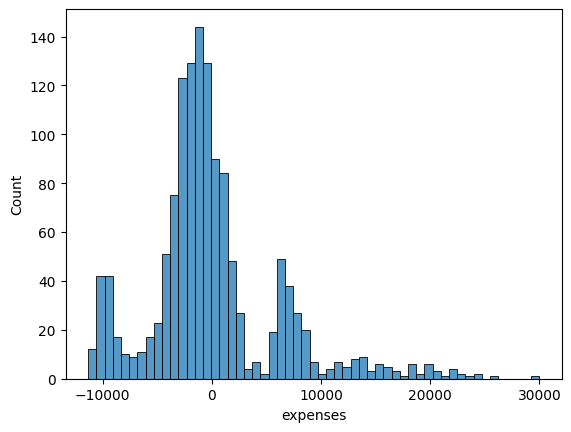

In [33]:
sns.histplot(y-LinearRegression().fit(X,y).predict(X))